# <center >Accidents corporels de la route
### Ouverture de la base de données et Structure des variables

Faire les importations nécessaires :

In [2]:
pip install graphviz

     |████████████████████████████████| 46 kB 1.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import graphviz
import seaborn as sns

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

Importer les 4 fichiers :

In [49]:
df_carac = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a", sep = ";")
df_lieux = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/2ad65965-36a1-4452-9c08-61a6c874e3e6", sep = ";")
df_usagers = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028", sep = ";")

Une première sélection a été réalisée. Nous avons éliminé les variables qui ne semblaient avoir aucun lien avec la gravité de l'accident.

In [50]:
df_carac = df_carac[["Num_Acc", "jour", "mois", "an", "hrmn", "lum", "dep", "com", "agg", "int", "atm", "col", "lat", "long"]]
df_lieux = df_lieux[["Num_Acc", "catr", "circ", "nbv", "surf", "infra", "situ", "vma"]] 
df_usagers = df_usagers[["Num_Acc", "id_vehicule", "place", "catu", "sexe", "grav", "an_nais", "trajet", "secu1"]] 

Fusionner les 4 bases de données :

In [52]:
df = df_usagers.merge(df_lieux, on=['Num_Acc'])
df = df.merge(df_carac, on=['Num_Acc'])

In [53]:
# Variables de la base Caracteristiques
df["lum"]= df['lum'].map({1:'Plein jour',
                        2:'Crépuscule ou aube',
                        3: "Nuit sans éclairage public",
                        4: "Nuit avec éclairage public non allumé",
                        5: "Nuit avec éclairage public allumé"})
df['agglo'] = df['agg'].map({1:'Hors agglomeration',
                             2:'Agglomeration'})
del df['agg']
df['atm'] = df['atm'].map({1:'Normale',
                             2:'Pluie legere',
                             3:'Pluie forte',
                             4:'Neige',
                          5:'Brouillard',
                          6:'Vent fort',
                          7:'Eblouissant',
                          8:'Couvert',
                          9:'Autre'})
df['collision'] = df['col'].map({1:'2 - frontale',
                             2:'2-arriere',
                             3:'2-cote',
                             4:'3-chaine',
                          5:'3-multiple',
                          6:'autre',
                          7:'Sans collision'})
del df['col']


# Variables de la base Usagers
df['catu'] = df['catu'].map({1:'Conducteur',
                             2:'Passager',
                             3:'Pieton'})
df['sexe'] = df['sexe'].map({1:'Homme',
                             2:'Femme'})
df['grav2'] = df['grav'].map({1:'Indemne',
                             2:'Indemne',
                             3:'Blesse',
                             4:'Blesse'})
df['grav'] = df['grav'].map({1:'Indemne',
                             2:'Tue',
                             3:'Blesse hospitalise',
                             4:'Blesse leger'})


# Variables de la base Lieux
df['catr'] = df['catr'].map({1:'Autoroute',
                             2:'Route nationale',
                             3:'Route départementale',
                             4:'Voie Communale',
                          5:'Hors réseau public',
                          6:'Parc de stationnement',
                          7:'Routes de métropole urbaine',
                          9:'Autre'})
df['surf'] = df['surf'].map({1:'Normale',
                             2:'Mouillée',
                             3:'Flaques',
                             4:'Inondée',
                          5:'Enneigée',
                          6:'Boue',
                          7:'Verglecée',
                             8:'Corps gras - huile',
                          9:'Autre'})

# Création de nouvelles variables
df['age'] = 2019 - df['an_nais']

### Appropriation du jeu de données

In [13]:
df.columns

Index(['Num_Acc', 'id_vehicule', 'place', 'catu', 'sexe', 'grav', 'an_nais',
       'trajet', 'secu1', 'catr', 'circ', 'nbv', 'surf', 'infra', 'situ',
       'vma', 'an', 'jour', 'mois', 'hrmn', 'lum', 'dep', 'atm', 'com', 'lat',
       'long', 'agglo', 'collision', 'grav4', 'grav2', 'age'],
      dtype='object')

In [14]:
df.head(5)

,Num_Acc,id_vehicule,place,catu,sexe,grav,an_nais,trajet,secu1,catr,...,dep,atm,com,lat,long,agglo,collision,grav4,grav2,age
0,201900000001,138 306 524,2,Passager,Femme,4,2002,0,1,Autoroute,...,93,Normale,93053,"48,8962100","2,4701200",Hors agglomeration,2-arriere,Blesse leger,Blesse,17
1,201900000001,138 306 524,1,Conducteur,Femme,4,1993,5,1,Autoroute,...,93,Normale,93053,"48,8962100","2,4701200",Hors agglomeration,2-arriere,Blesse leger,Blesse,26
2,201900000001,138 306 525,1,Conducteur,Homme,1,1959,0,1,Autoroute,...,93,Normale,93053,"48,8962100","2,4701200",Hors agglomeration,2-arriere,Indemne,Indemne,60
3,201900000002,138 306 523,1,Conducteur,Femme,4,1994,0,1,Autoroute,...,93,Normale,93066,"48,9307000","2,3688000",Hors agglomeration,autre,Blesse leger,Blesse,25
4,201900000003,138 306 520,1,Conducteur,Homme,1,1996,0,1,Autoroute,...,92,Normale,92036,"48,9358718","2,3191744",Hors agglomeration,3-chaine,Indemne,Indemne,23


In [15]:
df.dtypes

Num_Acc         int64
id_vehicule    object
place           int64
catu           object
sexe           object
grav            int64
an_nais         int64
trajet          int64
secu1           int64
catr           object
circ            int64
nbv             int64
surf           object
infra           int64
situ            int64
vma             int64
an              int64
jour            int64
mois            int64
hrmn           object
lum            object
dep            object
atm            object
com            object
lat            object
long           object
agglo          object
collision      object
grav4          object
grav2          object
age             int64
dtype: object

In [11]:
#print(df.describe(include='all'))

### Etude des valeurs manquantes :

Ce jeu de données est complet. Les valeurs non renseignées sont indiquées par "-1" dans la plupart des cas.
On peut remarquer qu'il y a 3704 valeurs manquantes. Nous les supprimerons dans la suite du travail

In [54]:
colonne = ["agglo", "sexe", "catr", "catu", "grav", "grav2", "collision", "atm", "surf"]
def effectif_pourcentage():
    for elem in colonne :
        print("Pour la variable " + elem + " :")
        print((df[elem].value_counts())/len(df[elem])*100)
        print("\n")
effectif_pourcentage()

Pour la variable agglo :
Agglomeration         62.259639
Hors agglomeration    37.740361
Name: agglo, dtype: float64


Pour la variable sexe :
Homme    67.969649
Femme    32.030351
Name: sexe, dtype: float64


Pour la variable catr :
Voie Communale                 41.478602
Route départementale           35.390331
Autoroute                      11.968235
Route nationale                 7.215534
Routes de métropole urbaine     2.202637
Autre                           0.923468
Parc de stationnement           0.699369
Hors réseau public              0.121826
Name: catr, dtype: float64


Pour la variable catu :
Conducteur    73.212661
Passager      18.315949
Pieton         8.471390
Name: catu, dtype: float64


Pour la variable grav :
Indemne               41.596667
Blesse leger          40.087384
Blesse hospitalise    15.685419
Tue                    2.630530
Name: grav, dtype: float64


Pour la variable grav2 :
Blesse     55.772803
Indemne    41.596667
Indemme     2.630530
Name: grav2, dt

**Regrouper les modalités ayant peu d'effectifs entre elles**

On regroupe les modalités entre elles lorsqu'elles forment moins de 5% de la population totale.

In [55]:
colonne = ["agglo", "sexe", "catr", "catu", "collision", "atm", "surf"]
def regroupement_modalites():
    for elem in colonne :
        frequence = df[elem].value_counts()/len(df[elem])*100
        for i in range(len(frequence)) :
            if frequence[i] < 5 :
                df.loc[df[elem]==frequence.index[i], elem] = "Autre"   
regroupement_modalites()

In [56]:
colonne = ["agglo", "sexe", "catr", "catu", "collision", "atm", "surf"]
def effectif_pourcentage():
    for elem in colonne :
        print("Pour la variable " + elem + " :")
        print((df[elem].value_counts())/len(df[elem])*100)
        print("\n")
effectif_pourcentage()

Pour la variable agglo :
Agglomeration         62.259639
Hors agglomeration    37.740361
Name: agglo, dtype: float64


Pour la variable sexe :
Homme    67.969649
Femme    32.030351
Name: sexe, dtype: float64


Pour la variable catr :
Voie Communale          41.478602
Route départementale    35.390331
Autoroute               11.968235
Route nationale          7.215534
Autre                    3.947299
Name: catr, dtype: float64


Pour la variable catu :
Conducteur    73.212661
Passager      18.315949
Pieton         8.471390
Name: catu, dtype: float64


Pour la variable collision :
2-cote            30.343593
autre             26.198516
2-arriere         13.518879
2 - frontale      10.495048
3-chaine           6.987675
Sans collision     6.514660
3-multiple         5.940125
Name: collision, dtype: float64


Pour la variable atm :
Normale         79.216707
Pluie legere    11.091392
Autre            9.691150
Name: atm, dtype: float64


Pour la variable surf :
Normale     80.052189
Mouillée

### Statistiques univariées

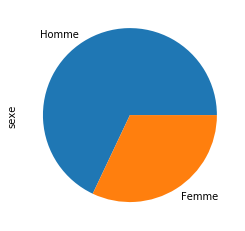

In [57]:
df["sexe"].value_counts().plot(kind = 'pie')

Pour la variable agglo :


Pour la variable sexe :


Pour la variable catr :


Pour la variable catu :


Pour la variable grav2 :


Pour la variable grav :


Pour la variable collision :


Pour la variable atm :


Pour la variable surf :




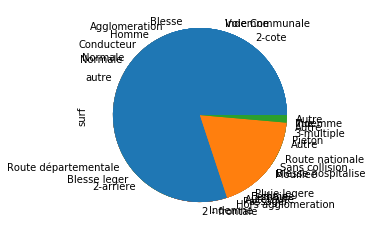

In [58]:
colonne = ["agglo", "sexe", "catr", "catu", "grav2", "grav", "collision", "atm", "surf"]
def camembert():
    for elem in colonne :
        print("Pour la variable " + elem + " :")
        df[elem].value_counts().plot(kind = 'pie', subplots = True)
        print("\n")
camembert()

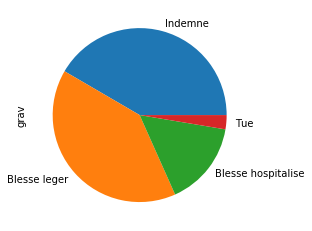

In [40]:
df["grav"].value_counts().plot(kind = 'pie')

In [41]:
df.groupby("sexe").grav.value_counts()

sexe   grav              
Femme  Blesse leger          19983
       Indemne               15638
       Blesse hospitalise     6196
       Tue                     776
Homme  Indemne               39676
       Blesse leger          33324
       Blesse hospitalise    14662
       Tue                    2722
Name: grav, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


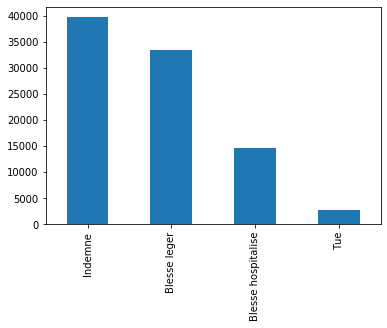

In [42]:
print(df[df.sexe == 'Homme'].grav.value_counts().plot(kind = 'bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


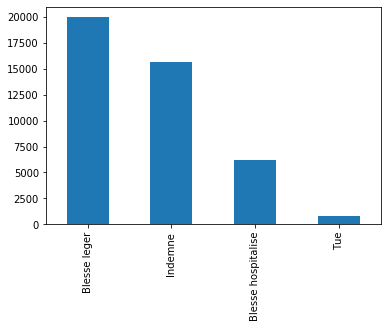

In [43]:
print(df[df.sexe == 'Femme'].grav.value_counts().plot(kind = 'bar'))

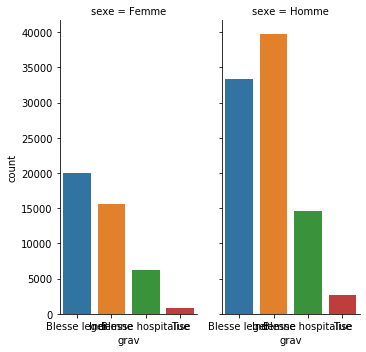

In [44]:
sns.catplot(x="grav",
            col='sexe',
            kind="count", data=df,
            aspect=0.5)

In [45]:
pd.crosstab(df.catu, df.grav)

grav,Blesse hospitalise,Blesse leger,Indemne,Tue
catu,,,,
Conducteur,14063,34628,46216,2449
Passager,3561,11506,8775,514
Pieton,3234,7173,323,535


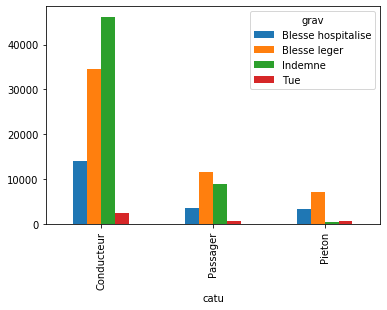

In [46]:
pd.crosstab(df.catu, df.grav).plot.bar()